### Import packages

In [11]:
import numpy as np
import h5py
import glob
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import AutoLocator, AutoMinorLocator, LogLocator
import cv2

### Physical constants

In [12]:
class CGSUnitsConst:
    eV = 1.60218e-12  # erg

class PhysConst:
    c = 2.99792458e10  # cm/s
    c2 = c * c
    c4 = c2 * c2
    hbar = 1.05457266e-27  # erg s
    hbarc = hbar * c  # erg cm
    GF = (1.1663787e-5 / (1e9 * 1e9 * CGSUnitsConst.eV * CGSUnitsConst.eV))
    Mp = 1.6726219e-24  # g
    sin2thetaW = 0.23122
    kB = 1.380658e-16  # erg/K

### Plot settings

In [13]:
# PLOT SETTINGS

# Font settings
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex=True)

# Tick settings
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.minor.size'] = 4

mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 2

# Axis linewidth
mpl.rcParams['axes.linewidth'] = 2

# Tick direction and enabling ticks on all sides
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

# Function to apply custom tick locators and other settings to an Axes object
def apply_custom_settings(ax, leg, log_scale_y=False):

    if log_scale_y:
        # Use LogLocator for the y-axis if it's in log scale
        ax.set_yscale('log')
        ax.yaxis.set_major_locator(LogLocator(base=10.0))
        ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))
    else:
        # Use AutoLocator for regular scales
        ax.yaxis.set_major_locator(AutoLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    # Apply the AutoLocator for the x-axis
    ax.xaxis.set_major_locator(AutoLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    
    # Legend settings
    leg.get_frame().set_edgecolor('w')
    leg.get_frame().set_linewidth(0.0)

### Directory to read data

In [14]:
directory_path = '../cell_15_48_15_d_1_1_10_c_1_1_10'
volume_cell = 1.0 # cm^3
volume = 10.0 # cm^3

directory_path = '../cell_15_48_15_d_1_1_20_c_1_1_40'
volume_cell = 0.5 # cm^3
volume = 20.0 # cm^3

# directory_path = '../cell_15_48_15_d_1_1_50_c_1_1_100'
# particles_file = '/plt479000'
# volume_cell = 0.5 # cm^3
# volume = 20.0 # cm^3

directory_path = '/home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-100'
dvolume_cell = 1e5**3/100 # cm^3
volume = 1e5**3 # cm^3

directory_path = '/home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1'
dvolume_cell = 1e5**3 # cm^3
volume = 1e5**3 # cm^3

plt_files_list = glob.glob(directory_path + '/plt*.h5')
plt_files_list.sort(key=lambda x: int(x.split('plt')[1].split('.h5')[0]))
print(f"Number of files: {len(plt_files_list)}")

Number of files: 301


### Compute average quantities

In [15]:
n_ee_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_uu_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_tt_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_eu_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_et_ave_inv_ccm    = np.zeros(len(plt_files_list))
nbar_ee_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_uu_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_tt_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_eu_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_et_ave_inv_ccm = np.zeros(len(plt_files_list))
time_s              = np.zeros(len(plt_files_list))

for idx, plt_file_name in enumerate(plt_files_list):
    
    print(f"Processing file: {plt_file_name}")

    with h5py.File(plt_file_name, 'r') as f:
        # Process the file as needed
        data_dict = {}
        for key in f.keys():
            data_dict[key] = np.array(f[key][:])
    
        time_s[idx] = data_dict['time'][0]
        n_ee_ave_inv_ccm[idx] = np.sum(data_dict['N00_Re']) / volume
        n_uu_ave_inv_ccm[idx] = np.sum(data_dict['N11_Re']) / volume
        n_tt_ave_inv_ccm[idx] = np.sum(data_dict['N22_Re']) / volume
        n_eu_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N01_Re']**2 + data_dict['N01_Im']**2 ) ) / volume
        n_et_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N02_Re']**2 + data_dict['N02_Im']**2 ) ) / volume
        nbar_ee_ave_inv_ccm[idx] = np.sum(data_dict['N00_Re']) / volume
        nbar_uu_ave_inv_ccm[idx] = np.sum(data_dict['N11_Re']) / volume
        nbar_tt_ave_inv_ccm[idx] = np.sum(data_dict['N22_Re']) / volume
        nbar_eu_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N01_Re']**2 + data_dict['N01_Im']**2 ) ) / volume
        nbar_et_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N02_Re']**2 + data_dict['N02_Im']**2 ) ) / volume
        

Processing file: /home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt00000.h5
Processing file: /home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt01000.h5
Processing file: /home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt02000.h5
Processing file: /home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt03000.h5
Processing file: /home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt04000.h5
Processing file: /home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt05000.h5
Processing file: /home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt06000.h5
Processing file: /home/erick/gw170817_1.00ye_local_simulations/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt07000.h5
Processing file: /home/erick/gw170817_1.00ye_local_simul

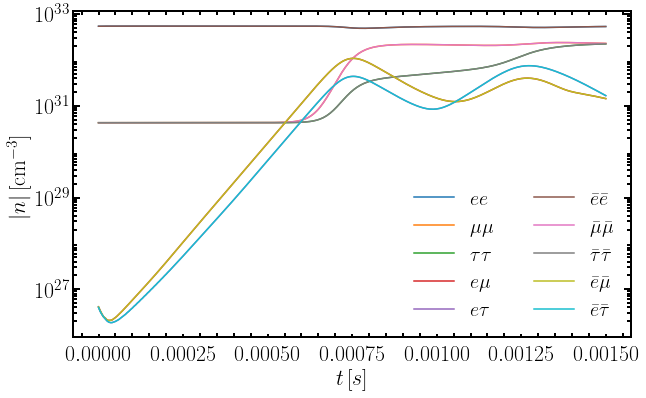

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_s, n_ee_ave_inv_ccm, label=r'$ee$')
ax.plot(time_s, n_uu_ave_inv_ccm, label=r'$\mu\mu$')
ax.plot(time_s, n_tt_ave_inv_ccm, label=r'$\tau\tau$')
ax.plot(time_s, n_eu_ave_inv_ccm, label=r'$e\mu$')
ax.plot(time_s, n_et_ave_inv_ccm, label=r'$e\tau$')
ax.plot(time_s, nbar_ee_ave_inv_ccm, label=r'$\bar{e}\bar{e}$')
ax.plot(time_s, nbar_uu_ave_inv_ccm, label=r'$\bar{\mu}\bar{\mu}$')
ax.plot(time_s, nbar_tt_ave_inv_ccm, label=r'$\bar{\tau}\bar{\tau}$')
ax.plot(time_s, nbar_eu_ave_inv_ccm, label=r'$\bar{e}\bar{\mu}$')
ax.plot(time_s, nbar_et_ave_inv_ccm, label=r'$\bar{e}\bar{\tau}$')
ax.set_xlabel(r'$t \, [s]$')
ax.set_ylabel(r'$|n| \, [\mathrm{cm}^{-3}$]')
leg = ax.legend(framealpha=0.0, ncol=2, fontsize=20)
apply_custom_settings(ax, leg, True)
# apply_custom_settings(ax, leg, False)
plt.savefig(f"plots/{directory_path.split('/')[-1]}_n_average.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

### Read allData.h5 file

In [17]:
n_ee_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_uu_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_tt_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_eu_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_et_ave_inv_ccm    = np.zeros(len(plt_files_list))
nbar_ee_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_uu_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_tt_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_eu_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_et_ave_inv_ccm = np.zeros(len(plt_files_list))
time_s              = np.zeros(len(plt_files_list))

all_data_path = os.path.join(directory_path, 'allData.h5')
with h5py.File(all_data_path, 'r') as all_data_file:
    
    nee =  np.array(all_data_file['/N00_Re(1|ccm)'][:])
    nuu =  np.array(all_data_file['/N11_Re(1|ccm)'][:])
    ntt =  np.array(all_data_file['/N22_Re(1|ccm)'][:])
    neu =  np.sqrt(np.array(all_data_file['/N01_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N01_Im(1|ccm)'][:])**2)
    net =  np.sqrt(np.array(all_data_file['/N02_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N02_Im(1|ccm)'][:])**2)

    nbar_ee = np.array(all_data_file['/N00_Re(1|ccm)'][:])
    nbar_uu = np.array(all_data_file['/N11_Re(1|ccm)'][:])
    nbar_tt = np.array(all_data_file['/N22_Re(1|ccm)'][:])
    nbar_eu = np.sqrt(np.array(all_data_file['/N01_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N01_Im(1|ccm)'][:])**2)
    nbar_et = np.sqrt(np.array(all_data_file['/N02_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N02_Im(1|ccm)'][:])**2)

    n_ee_ave_inv_ccm = np.mean(nee, axis=tuple(range(1, nee.ndim)))
    n_uu_ave_inv_ccm = np.mean(nuu, axis=tuple(range(1, nuu.ndim)))
    n_tt_ave_inv_ccm = np.mean(ntt, axis=tuple(range(1, ntt.ndim)))
    n_eu_ave_inv_ccm = np.mean(neu, axis=tuple(range(1, neu.ndim)))
    n_et_ave_inv_ccm = np.mean(net, axis=tuple(range(1, net.ndim)))
    nbar_ee_ave_inv_ccm = np.mean(nbar_ee, axis=tuple(range(1, nbar_ee.ndim)))
    nbar_uu_ave_inv_ccm = np.mean(nbar_uu, axis=tuple(range(1, nbar_uu.ndim)))
    nbar_tt_ave_inv_ccm = np.mean(nbar_tt, axis=tuple(range(1, nbar_tt.ndim)))
    nbar_eu_ave_inv_ccm = np.mean(nbar_eu, axis=tuple(range(1, nbar_eu.ndim)))
    nbar_et_ave_inv_ccm = np.mean(nbar_et, axis=tuple(range(1, nbar_et.ndim)))

    time_s = np.array(all_data_file['/t(s)'][:])

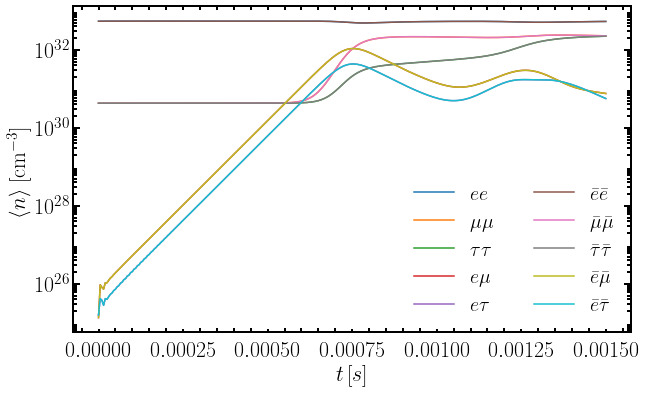

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_s, n_ee_ave_inv_ccm, label=r'$ee$')
ax.plot(time_s, n_uu_ave_inv_ccm, label=r'$\mu\mu$')
ax.plot(time_s, n_tt_ave_inv_ccm, label=r'$\tau\tau$')
ax.plot(time_s, n_eu_ave_inv_ccm, label=r'$e\mu$')
ax.plot(time_s, n_et_ave_inv_ccm, label=r'$e\tau$')
ax.plot(time_s, nbar_ee_ave_inv_ccm, label=r'$\bar{e}\bar{e}$')
ax.plot(time_s, nbar_uu_ave_inv_ccm, label=r'$\bar{\mu}\bar{\mu}$')
ax.plot(time_s, nbar_tt_ave_inv_ccm, label=r'$\bar{\tau}\bar{\tau}$')
ax.plot(time_s, nbar_eu_ave_inv_ccm, label=r'$\bar{e}\bar{\mu}$')
ax.plot(time_s, nbar_et_ave_inv_ccm, label=r'$\bar{e}\bar{\tau}$')
ax.set_xlabel(r'$t \, [s]$')
ax.set_ylabel(r'$\langle n \rangle \; [\mathrm{cm}^{-3}]$')
leg = ax.legend(framealpha=0.0, ncol=2, fontsize=20)
apply_custom_settings(ax, leg, True)
# apply_custom_settings(ax, leg, False)
plt.savefig(f"plots/{directory_path.split('/')[-1]}_n_average.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

In [19]:
all_data_path = os.path.join(directory_path, 'allData.h5')
with h5py.File(all_data_path, 'r') as all_data_file:
    
    nee =  np.array(all_data_file['/N00_Re(1|ccm)'][:])
    nuu =  np.array(all_data_file['/N11_Re(1|ccm)'][:])
    ntt =  np.array(all_data_file['/N22_Re(1|ccm)'][:])
    neu =  np.sqrt(np.array(all_data_file['/N01_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N01_Im(1|ccm)'][:])**2)
    net =  np.sqrt(np.array(all_data_file['/N02_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N02_Im(1|ccm)'][:])**2)

    nbar_ee = np.array(all_data_file['/N00_Re(1|ccm)'][:])
    nbar_uu = np.array(all_data_file['/N11_Re(1|ccm)'][:])
    nbar_tt = np.array(all_data_file['/N22_Re(1|ccm)'][:])
    nbar_eu = np.sqrt(np.array(all_data_file['/N01_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N01_Im(1|ccm)'][:])**2)
    nbar_et = np.sqrt(np.array(all_data_file['/N02_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N02_Im(1|ccm)'][:])**2)

    time_s = np.array(all_data_file['/t(s)'][:])

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

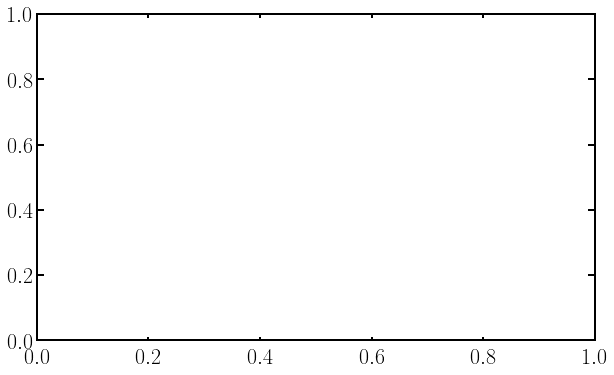

In [20]:
def plot_colored_lines(x, y, time_s, xlabel, ylabel, cbarlabel, filename=None):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    num_lines = y.shape[0]

    # Normalize time for colormap
    norm = plt.Normalize(time_s.min(), time_s.max())
    cmap = plt.cm.viridis

    for i in range(num_lines):
        color = cmap(norm(time_s[i]))
        ax.plot(x, y[i,0,0,:], color=color)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Only needed for matplotlib < 3.1

    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(cbarlabel)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    leg = ax.legend(framealpha=0.0, ncol=2, fontsize=20)
    apply_custom_settings(ax, leg, False)
    if filename is not None and filename != "":
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)

plot_colored_lines(np.arange(1e5/100 - 1e5/200, 1e5, 1e5/100), nee, time_s, r'$z \, [\mathrm{cm}]$', r'$n_{ee} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_ee.pdf")
plot_colored_lines(np.arange(1e5/100 - 1e5/200, 1e5, 1e5/100), nuu, time_s, r'$z \, [\mathrm{cm}]$', r'$n_{\mu\mu} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_mumu.pdf")
plot_colored_lines(np.arange(1e5/100 - 1e5/200, 1e5, 1e5/100), ntt, time_s, r'$z \, [\mathrm{cm}]$', r'$n_{\tau\tau} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_tautau.pdf")
plot_colored_lines(np.arange(1e5/100 - 1e5/200, 1e5, 1e5/100), neu, time_s, r'$z \, [\mathrm{cm}]$', r'$n_{e\mu} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_eu.pdf")
plot_colored_lines(np.arange(1e5/100 - 1e5/200, 1e5, 1e5/100), net, time_s, r'$z \, [\mathrm{cm}]$', r'$n_{e\tau} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_et.pdf")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifftshift

def do_FT(x, f_x):

    N = len(x) # Number of sample points
    dx = x[1] - x[0] # Grid spacing cm

    # ----- Compute Fourier Transform -----
    f_x_shifted = ifftshift(f_x)        # Shift for FFT
    f_k = fftshift(fft(f_x_shifted)) * dx  # FFT and scaling

    # ----- Compute wave numbers (k_x) -----
    k_x = fftshift(fftfreq(N, d=dx)) * 2 * np.pi  # f=2pi/lambda : Angular frequency in rad/cm

    # Only keep positive k_x and corresponding f_k
    mask = k_x > 0
    k_x = k_x[mask]
    f_k = f_k[mask]

    return k_x, f_k

wavelengths   = []
f_wavelengths = []

for i in range(neu.shape[0]):

    x = np.arange(0.25, 20, 0.5) # cm
    f_x = neu[i,0,0,:] # 1/ccm

    kx, fk = do_FT(x, f_x)
    labmda_x = 2 * np.pi / kx  # Wavelength in cm

    wavelengths.append(labmda_x)
    f_wavelengths.append(np.abs(fk))

time_fft = time_s.copy()
wavelengths = np.array(wavelengths)
f_wavelengths = np.array(f_wavelengths)
print(f"f_wavelengths.shape = {f_wavelengths.shape}")
f_wavelengths = f_wavelengths[:,np.newaxis,np.newaxis,:]
print(f"f_wavelengths.shape = {f_wavelengths.shape}")

plot_colored_lines(wavelengths[0], f_wavelengths, time_fft, r'wavelenght', r'amplitude', r'$t \, [s]$')

####################################################
# Test Fourier Transform with a Gaussian function
####################################################

N = 2048           # Number of sample points
L = 10.0           # Width of the domain

x = np.linspace(-L/2, L/2, N, endpoint=False)
f = np.exp(-np.pi * x**2)

# Compute Fourier Transform
kx, fk = do_FT(x, f)
labmda_x = 2 * np.pi / kx  # Wavelength in cm

# ----- Plot the magnitude of the FT -----
plt.figure(figsize=(10, 6))
plt.plot(kx/(2*np.pi), np.abs(fk))
plt.plot(x, f)
plt.xlim(-4, 4)
plt.legend()
plt.tight_layout()
plt.show()
